# Import Libraries

In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.manifold import TSNE

# Obtain Data

In [2]:
#Read mushroom data to csv
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Scrub Data

In [3]:
#Replace class letters with numerical values
edible_dict = {'p':0, 'e':1}
df['class'] = df['class'].replace(edible_dict)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Write function to create dummy variables for each mushroom characteristic
def create_dummies(df, column_name):
    dummies_df = pd.get_dummies(df[column_name])
    drop_column = dummies_df.columns[0]
    dummies_df.drop(drop_column, axis=1, inplace=True)
    dummy_column_names = []
    for dummy_col_name in dummies_df.columns:
        dummies_df.rename(columns={dummy_col_name:column_name+':'+dummy_col_name}, inplace=True)
    return dummies_df

#Create dummies for each mushroom characteristic using create_dummies function
mushroom_df = df[['class']]
for col_name in df.columns[1:]:
    mushroom_df = pd.concat([mushroom_df,create_dummies(df, col_name)], axis=1)
mushroom_df.head()

,class,cap-shape:c,cap-shape:f,cap-shape:k,cap-shape:s,cap-shape:x,cap-surface:g,cap-surface:s,cap-surface:y,cap-color:c,...,population:n,population:s,population:v,population:y,habitat:g,habitat:l,habitat:m,habitat:p,habitat:u,habitat:w
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
#Search for missing values in data
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class                       8124 non-null   int64
 1   cap-shape:c                 8124 non-null   uint8
 2   cap-shape:f                 8124 non-null   uint8
 3   cap-shape:k                 8124 non-null   uint8
 4   cap-shape:s                 8124 non-null   uint8
 5   cap-shape:x                 8124 non-null   uint8
 6   cap-surface:g               8124 non-null   uint8
 7   cap-surface:s               8124 non-null   uint8
 8   cap-surface:y               8124 non-null   uint8
 9   cap-color:c                 8124 non-null   uint8
 10  cap-color:e                 8124 non-null   uint8
 11  cap-color:g                 8124 non-null   uint8
 12  cap-color:n                 8124 non-null   uint8
 13  cap-color:p                 8124 non-null   uint8
 14  cap-colo

# Explore Data

In [6]:
#Calculate mushroom_df shape to determine the number of datapoints and variables
mushroom_df.shape

(8124, 96)

In [7]:
#Calculate mushroom class balance
print('Edible Proportion:', mushroom_df['class'].mean())

Edible Proportion: 0.517971442639094


Text(0.5, 1.0, 'Edible Mushroom Class Balance')

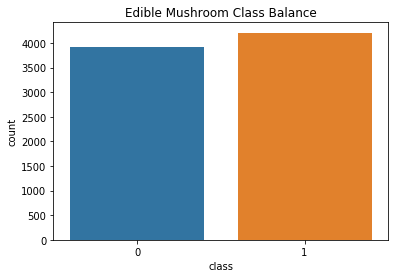

In [8]:
#Create formatted bar graph for class distribution
sns.countplot(df['class']).set_title('Edible Mushroom Class Balance')

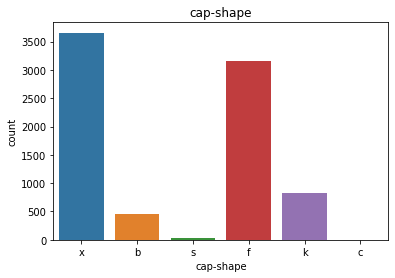

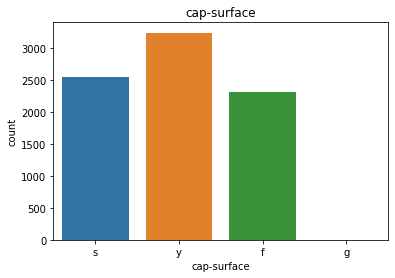

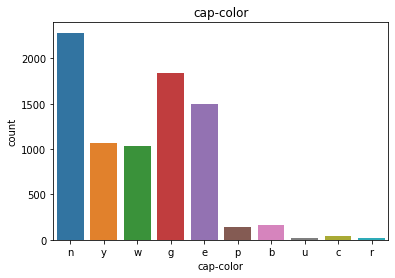

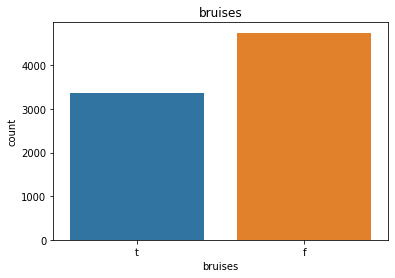

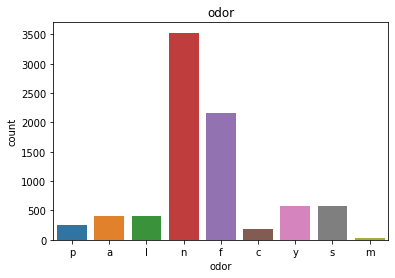

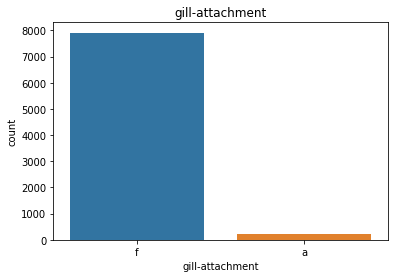

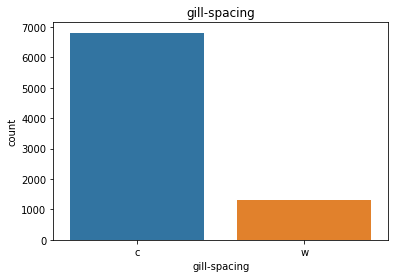

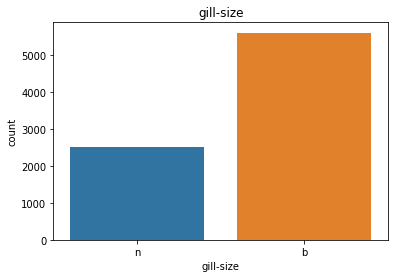

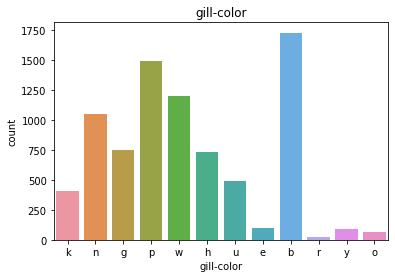

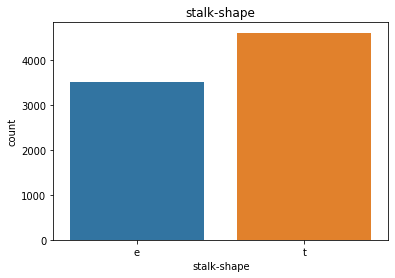

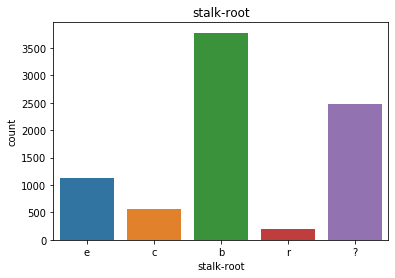

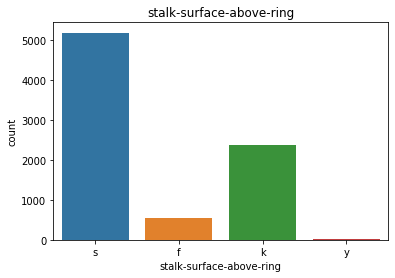

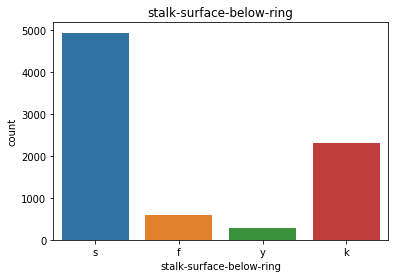

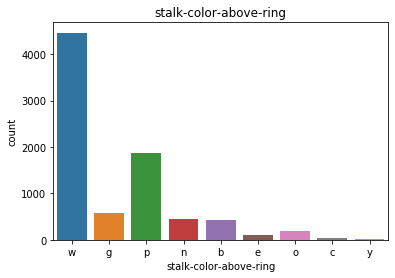

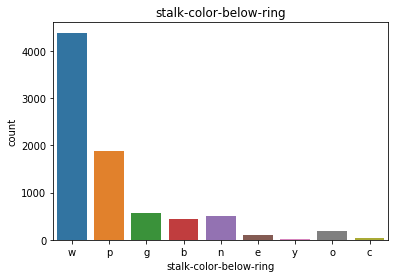

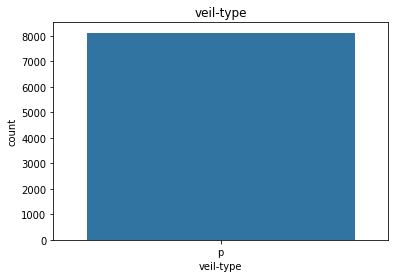

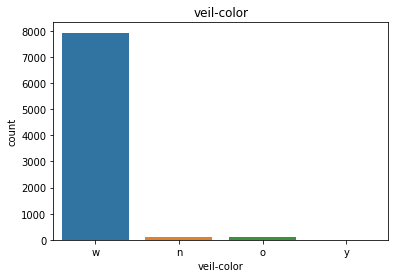

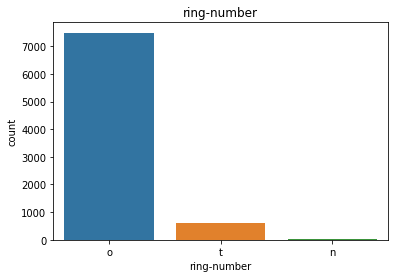

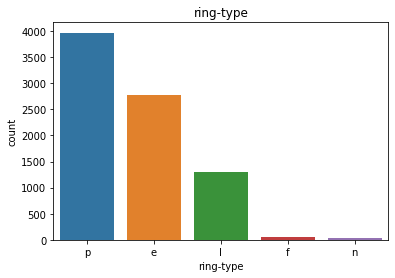

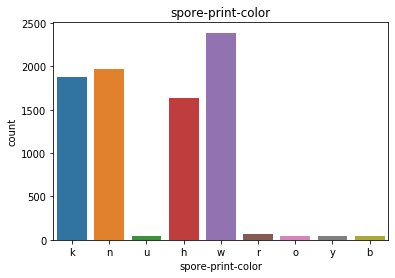

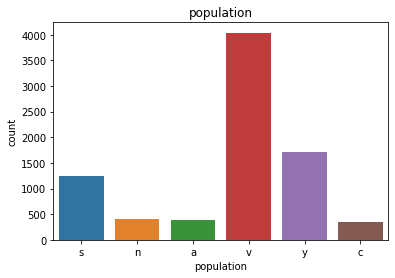

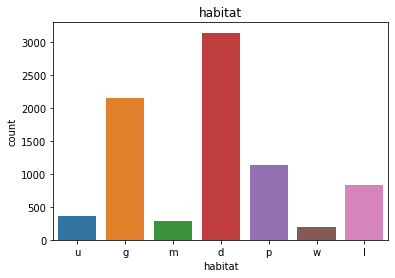

In [9]:
#Create countplots of class distribution for each feature to contextualize modeling
for i, col in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.countplot(df[col]).set_title('{}'.format(col))

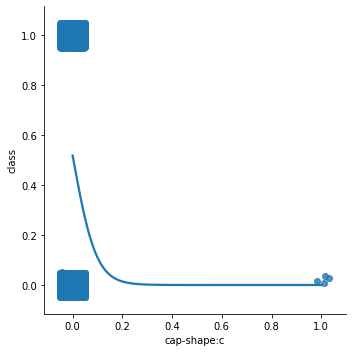

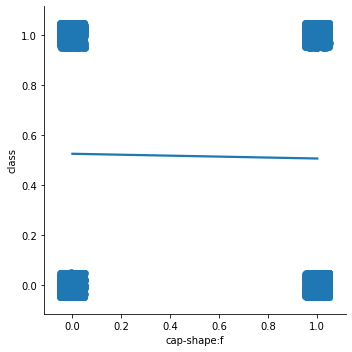

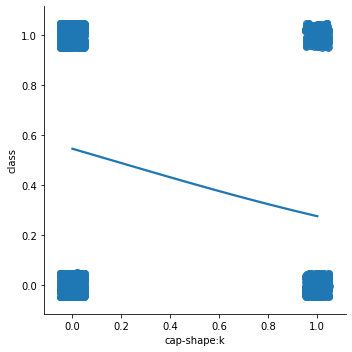

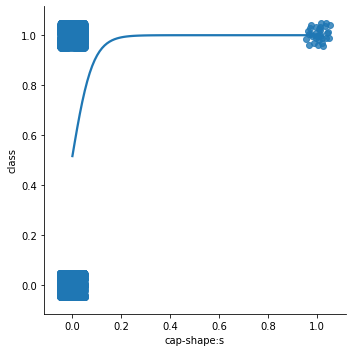

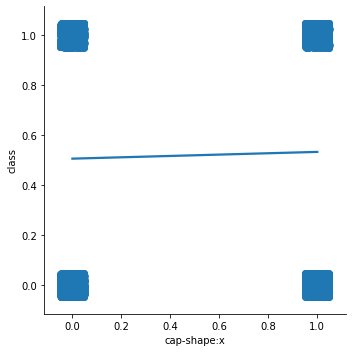

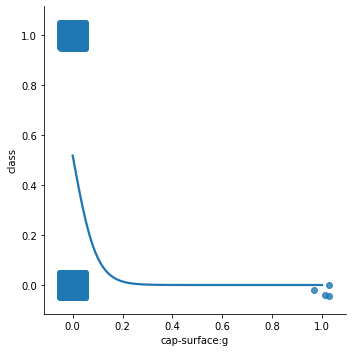

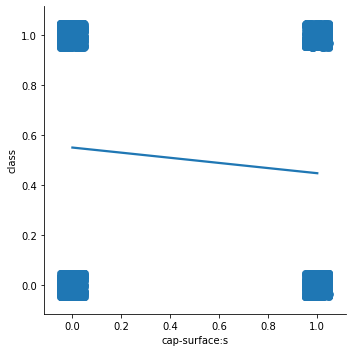

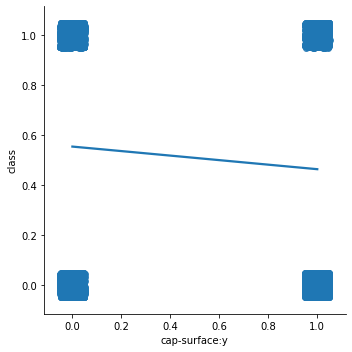

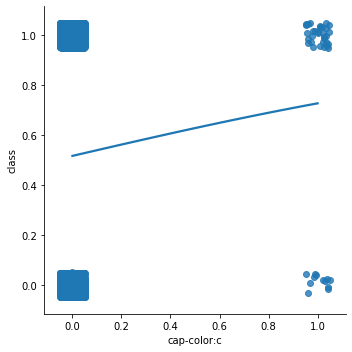

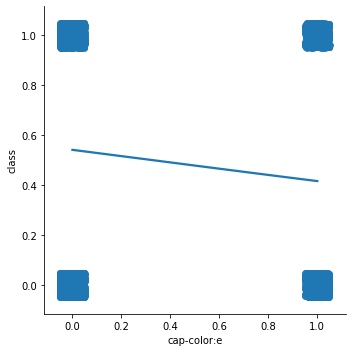

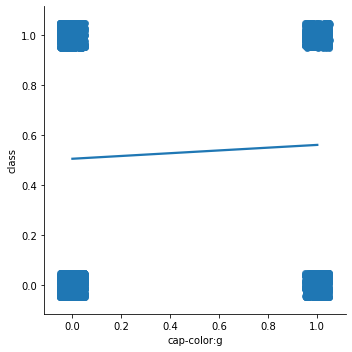

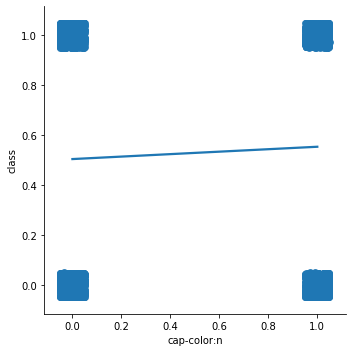

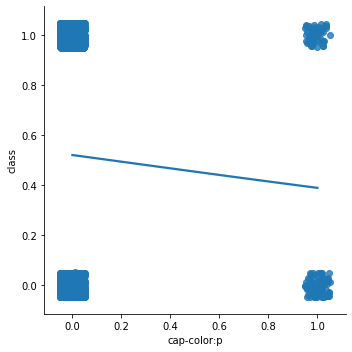

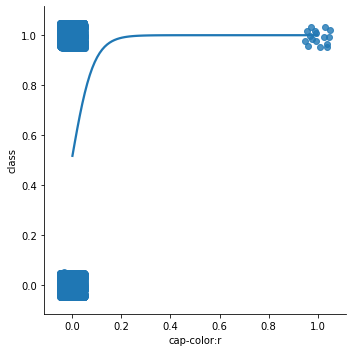

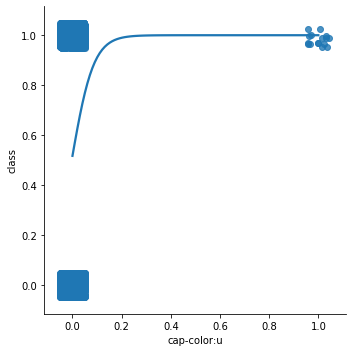

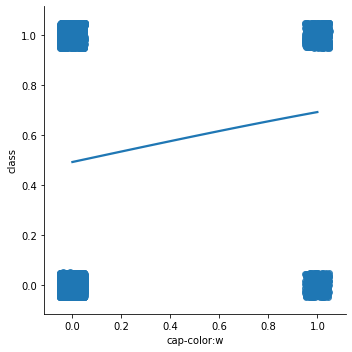

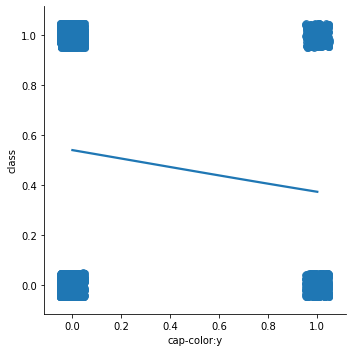

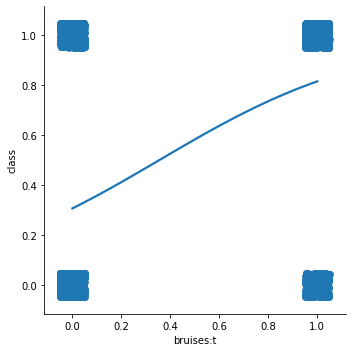

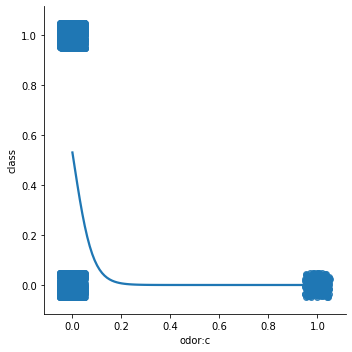

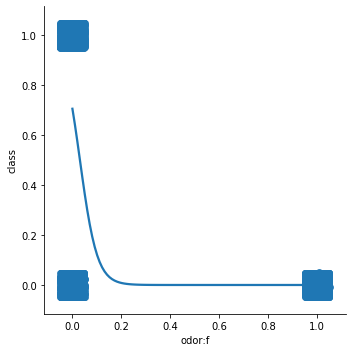

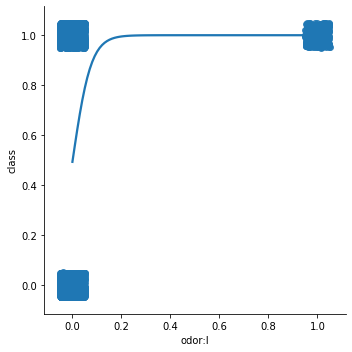

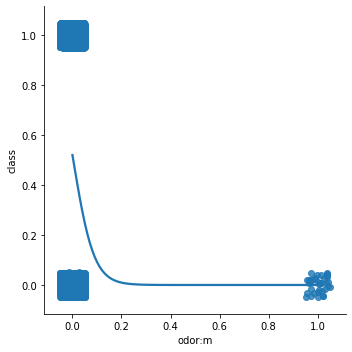

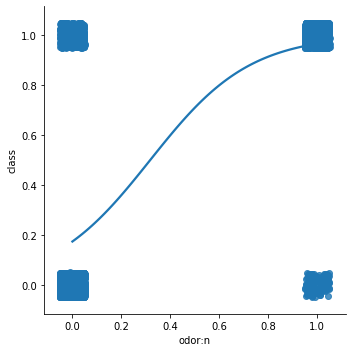

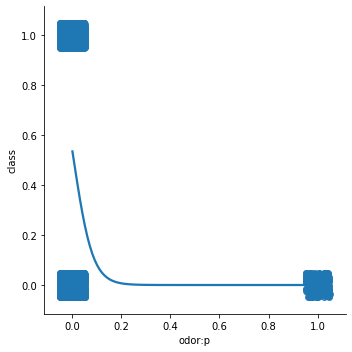

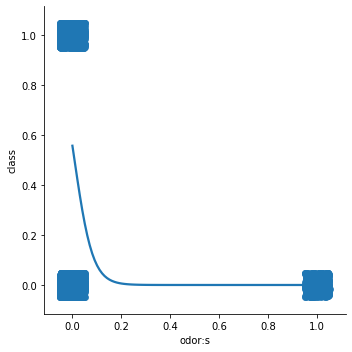

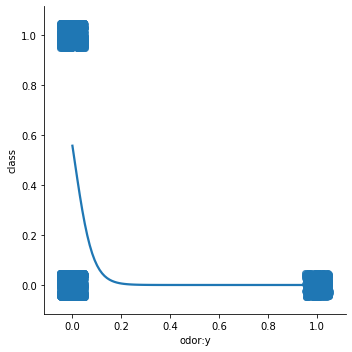

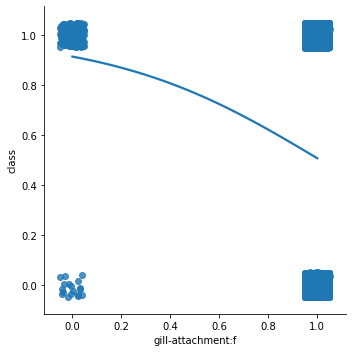

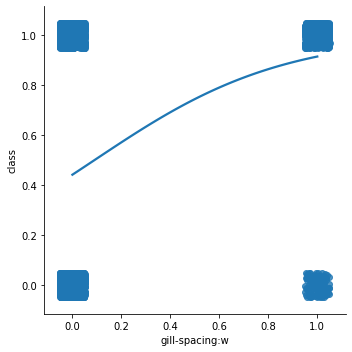

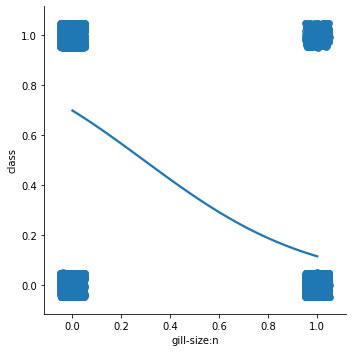

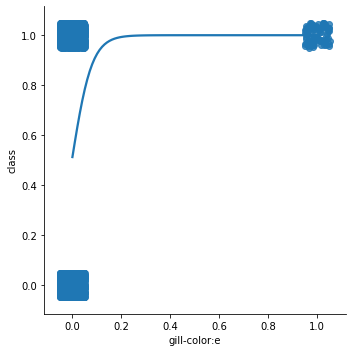

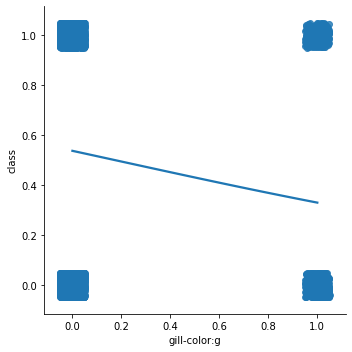

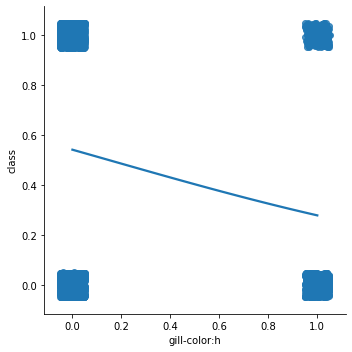

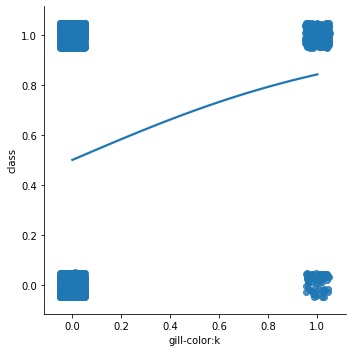

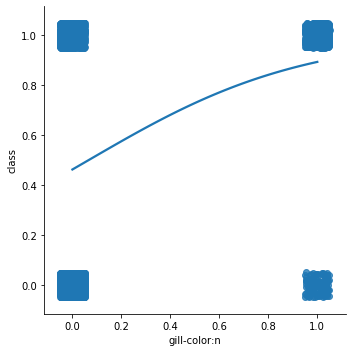

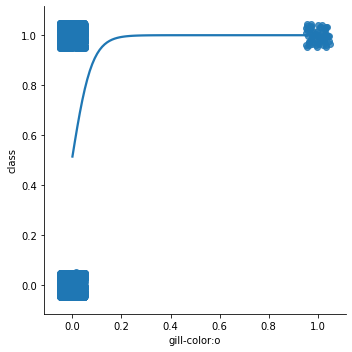

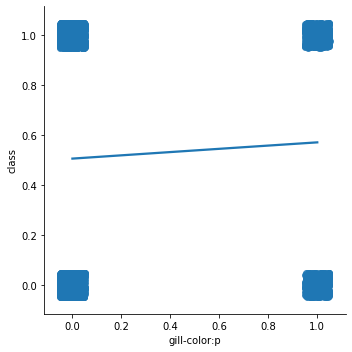

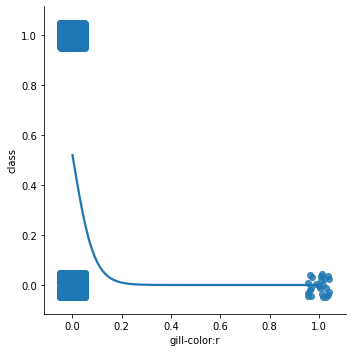

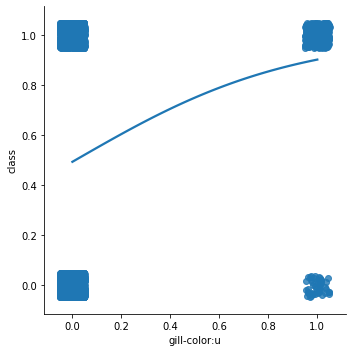

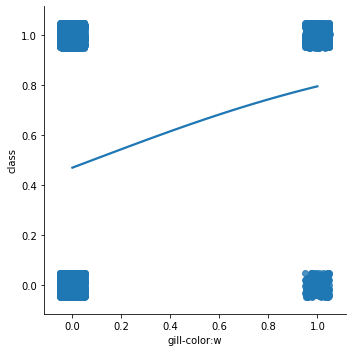

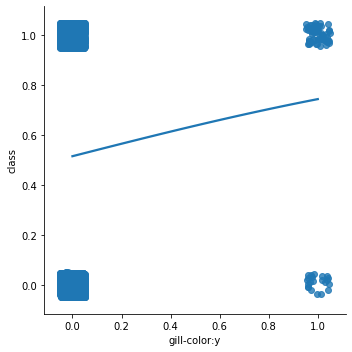

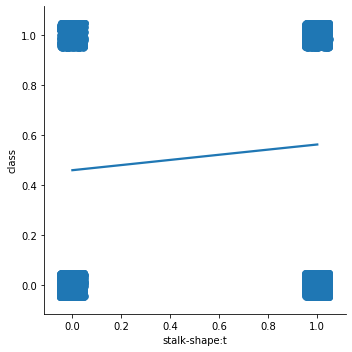

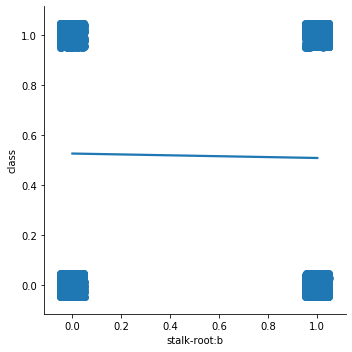

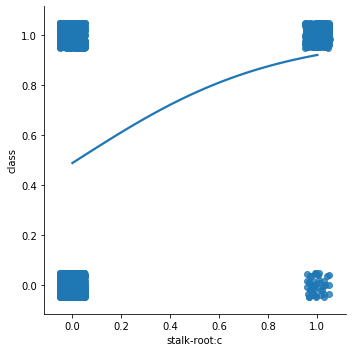

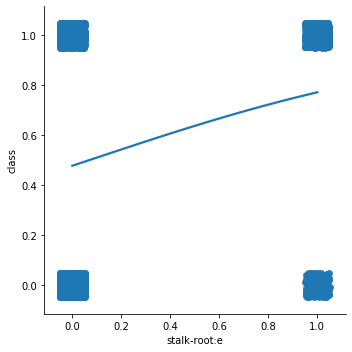

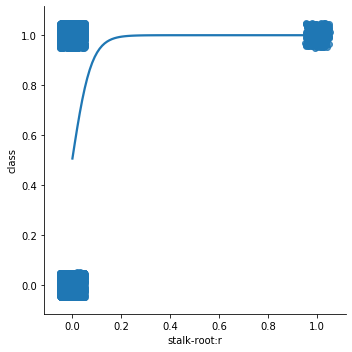

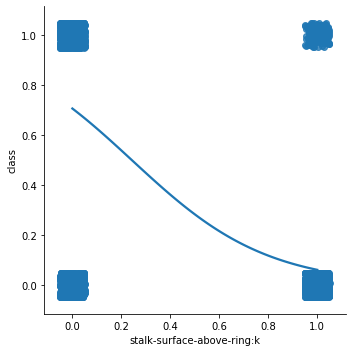

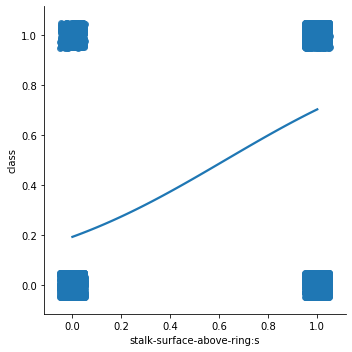

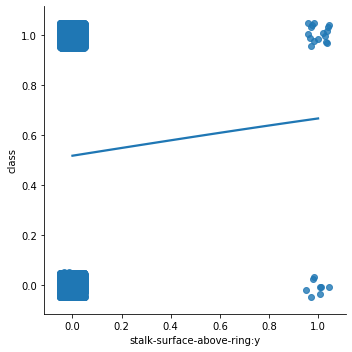

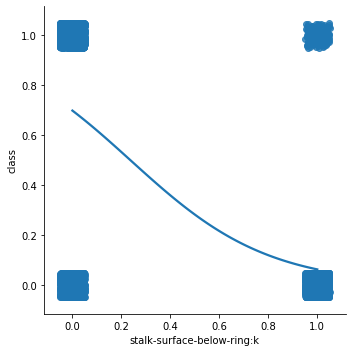

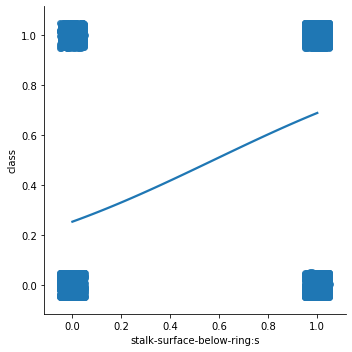

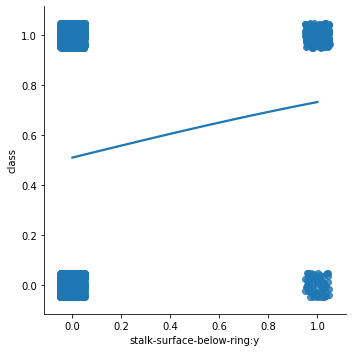

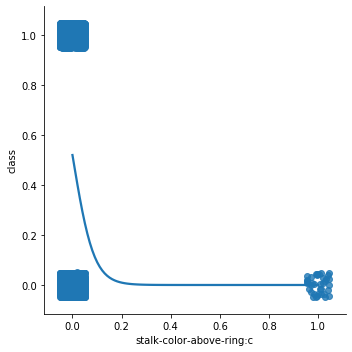

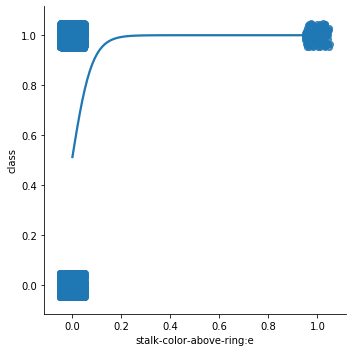

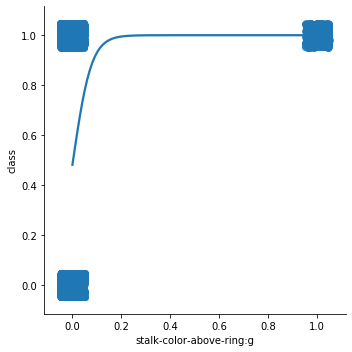

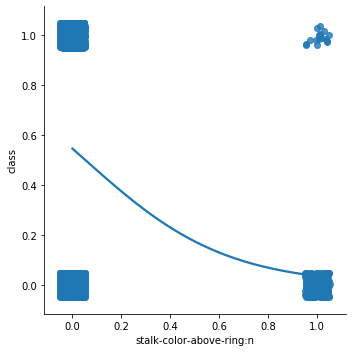

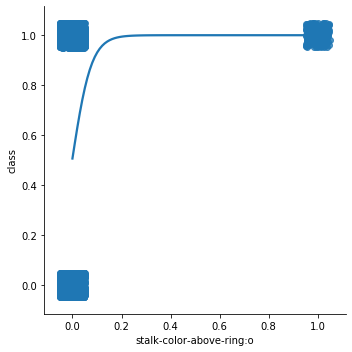

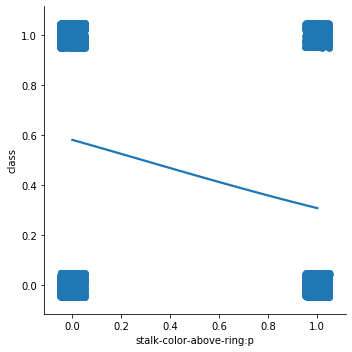

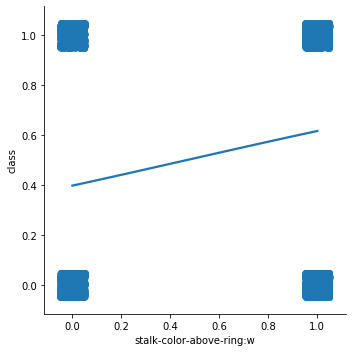

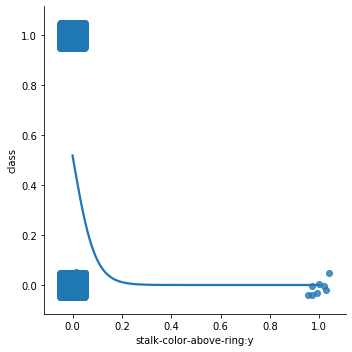

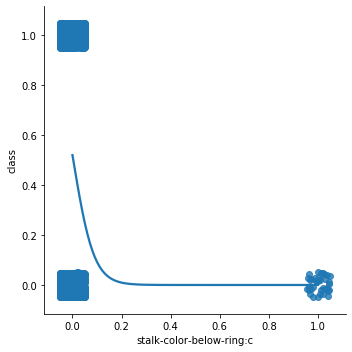

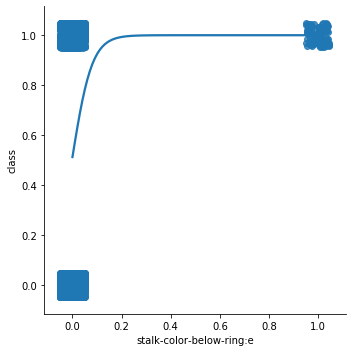

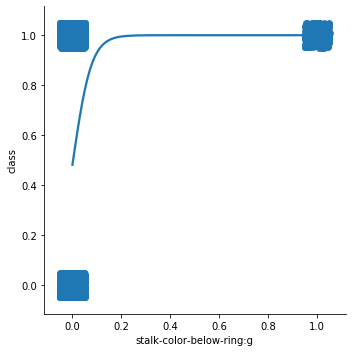

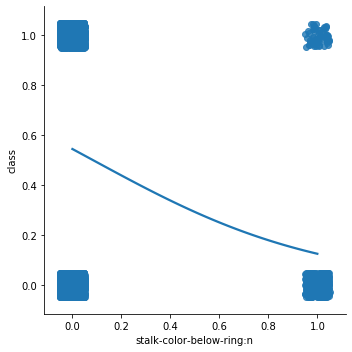

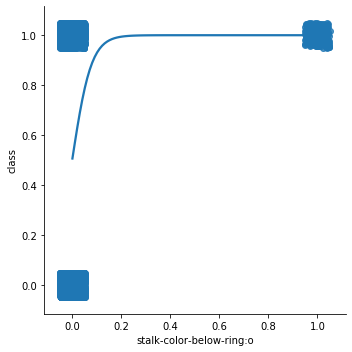

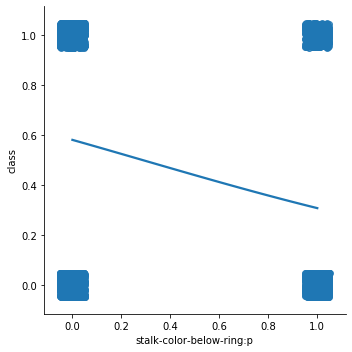

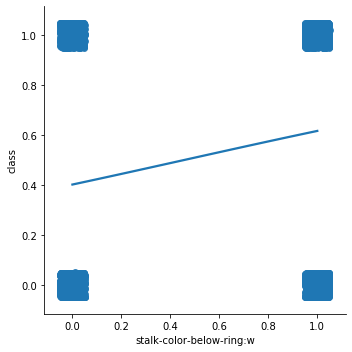

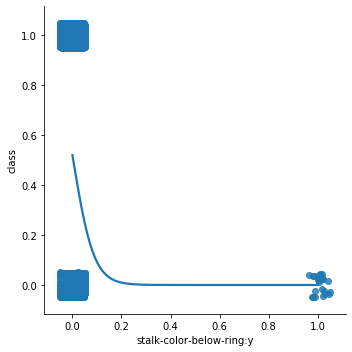

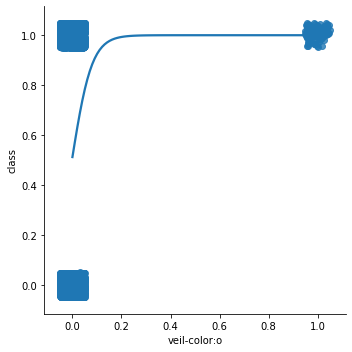

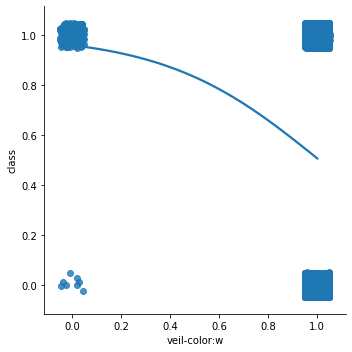

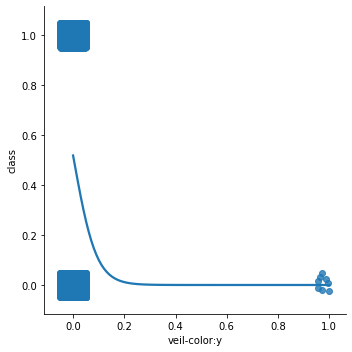

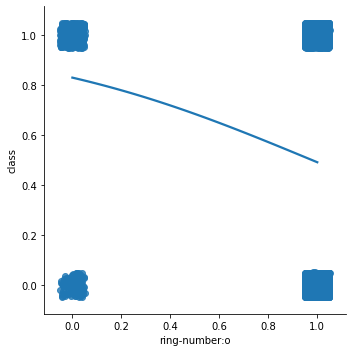

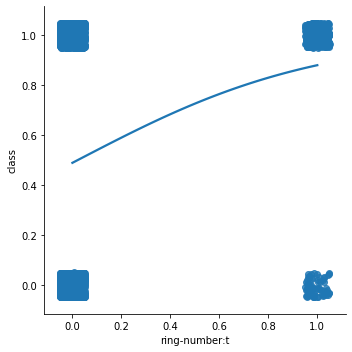

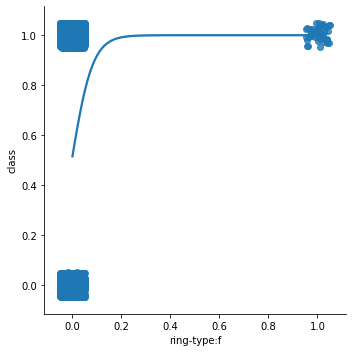

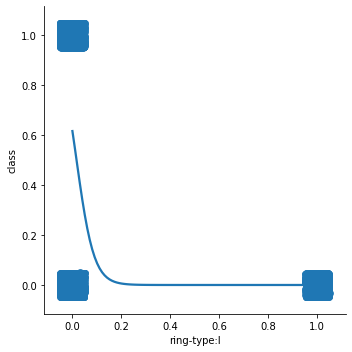

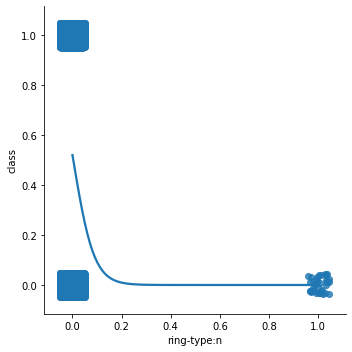

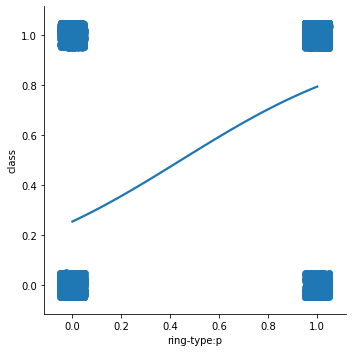

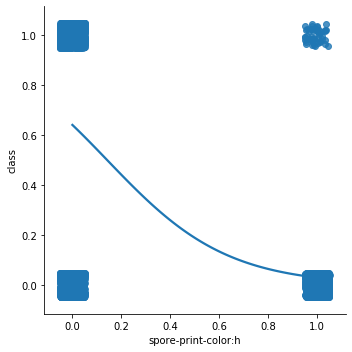

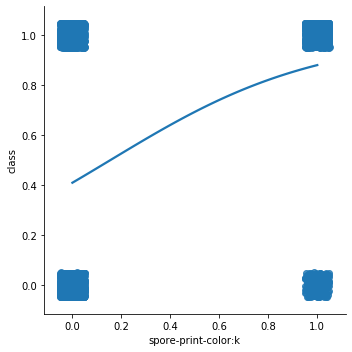

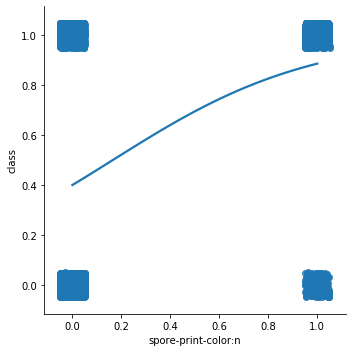

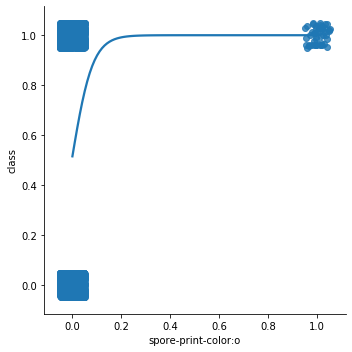

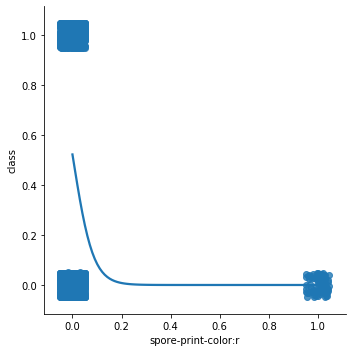

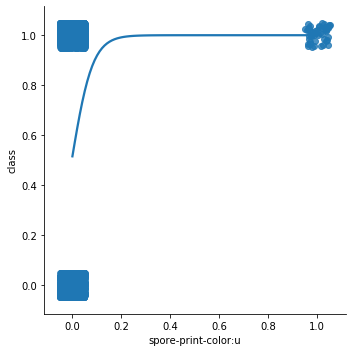

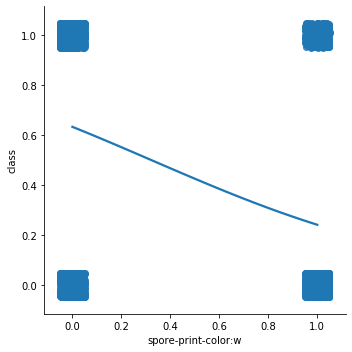

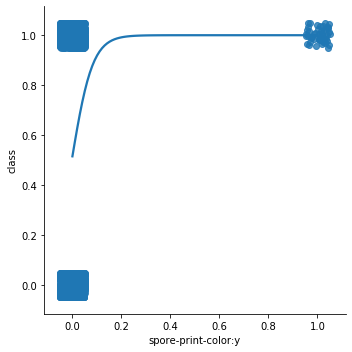

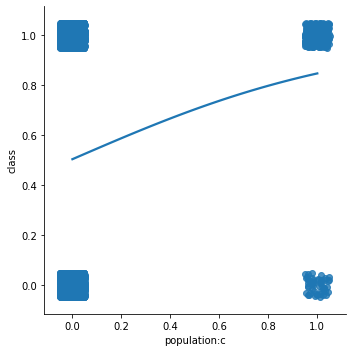

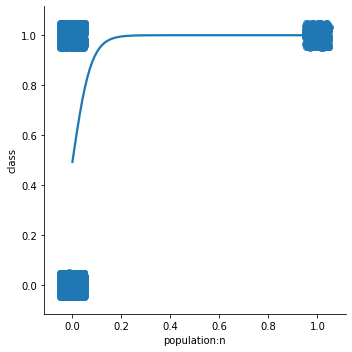

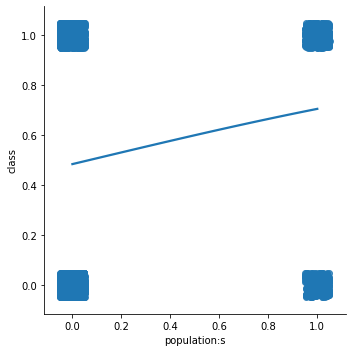

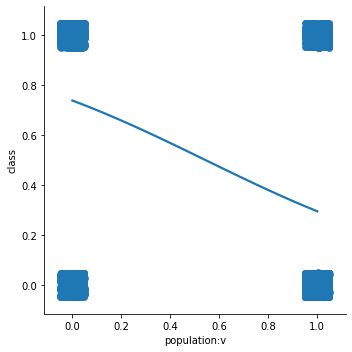

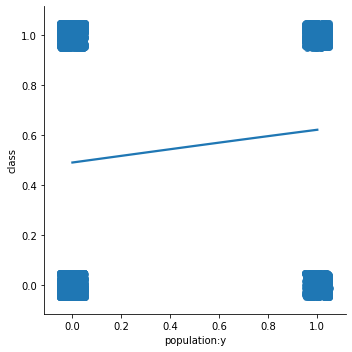

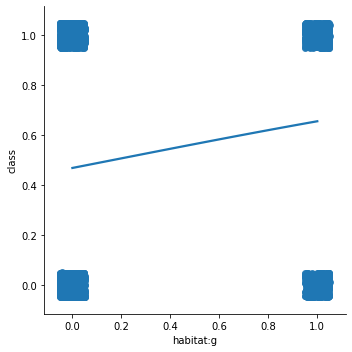

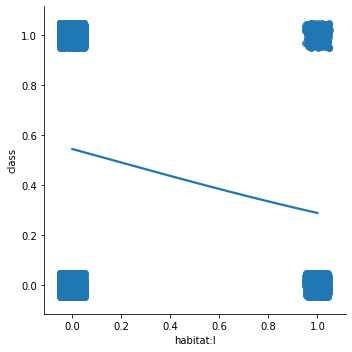

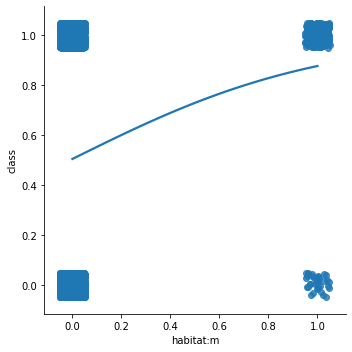

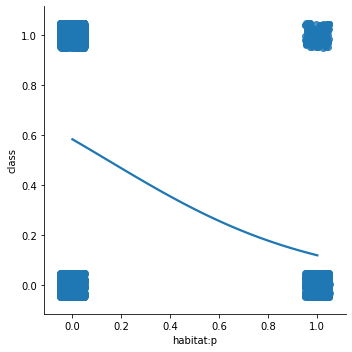

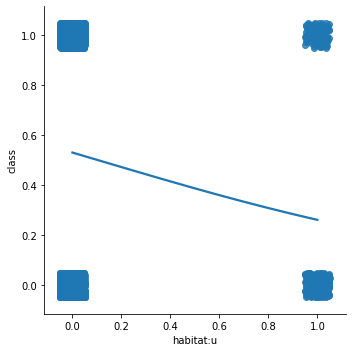

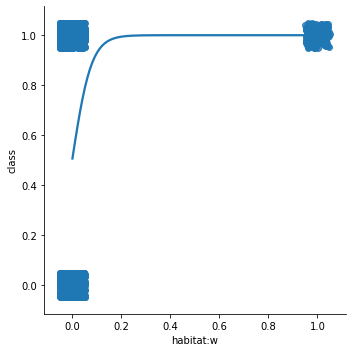

In [10]:
#Create lmplots showing relationship between each feature and class
pairplot_list = mushroom_df.columns[1:]
for pairplot in pairplot_list:
    sns.lmplot(data=mushroom_df, y = 'class', x = pairplot, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.05,
              sharex = False, sharey = False)

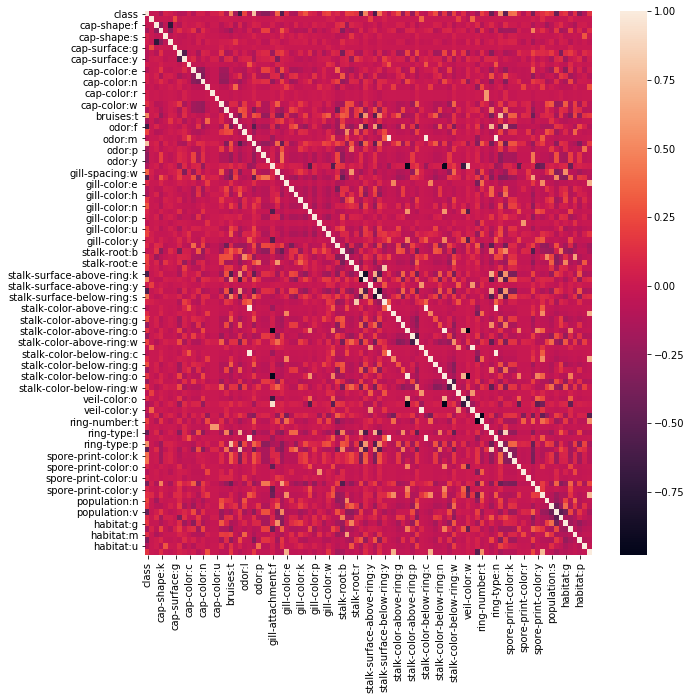

In [11]:
#Create heatmap showing correlated features
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
corr_table = mushroom_df.corr()
sns.heatmap(corr_table, ax = ax)

# Model Data

In [12]:
#Create x and y variables from data
x_vars = list(mushroom_df.columns)
x_vars.remove('class')
x = mushroom_df[x_vars]
y = mushroom_df['class']

In [13]:
#Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=27)

In [14]:
#Scale data using standard scaler
ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [15]:
#Build dummy classifier and calculate f1 score for training and test sets
dummy = DummyClassifier(random_state = 63)
dummy.fit(x_train, y_train)
y_train_pred_dummy = dummy.predict(x_train)
y_test_pred_dummy = dummy.predict(x_test)
print('training f1 score', f1_score(y_train, y_train_pred_dummy))
print('test f1 score', f1_score(y_test, y_test_pred_dummy))

training f1 score 0.5150512214342002
test f1 score 0.50293542074364


In [16]:
#Build KNN model and calculate f1 score for training and test sets
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)
print('training f1 score', f1_score(y_train, y_train_pred_knn))
print('test f1 score', f1_score(y_test, y_test_pred_knn))

training f1 score 1.0
test f1 score 1.0


In [17]:
#Build Decision Tree model and calculate f1 score for training and test sets
tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(x_train, y_train)
y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)
print('training f1 score', f1_score(y_train, y_train_pred_tree))
print('test f1 score', f1_score(y_test, y_test_pred_tree))

training f1 score 1.0
test f1 score 1.0


# Analyze Data

Text(0.5, 1.0, 'Mushroom Edibility Classification Decision Tree')

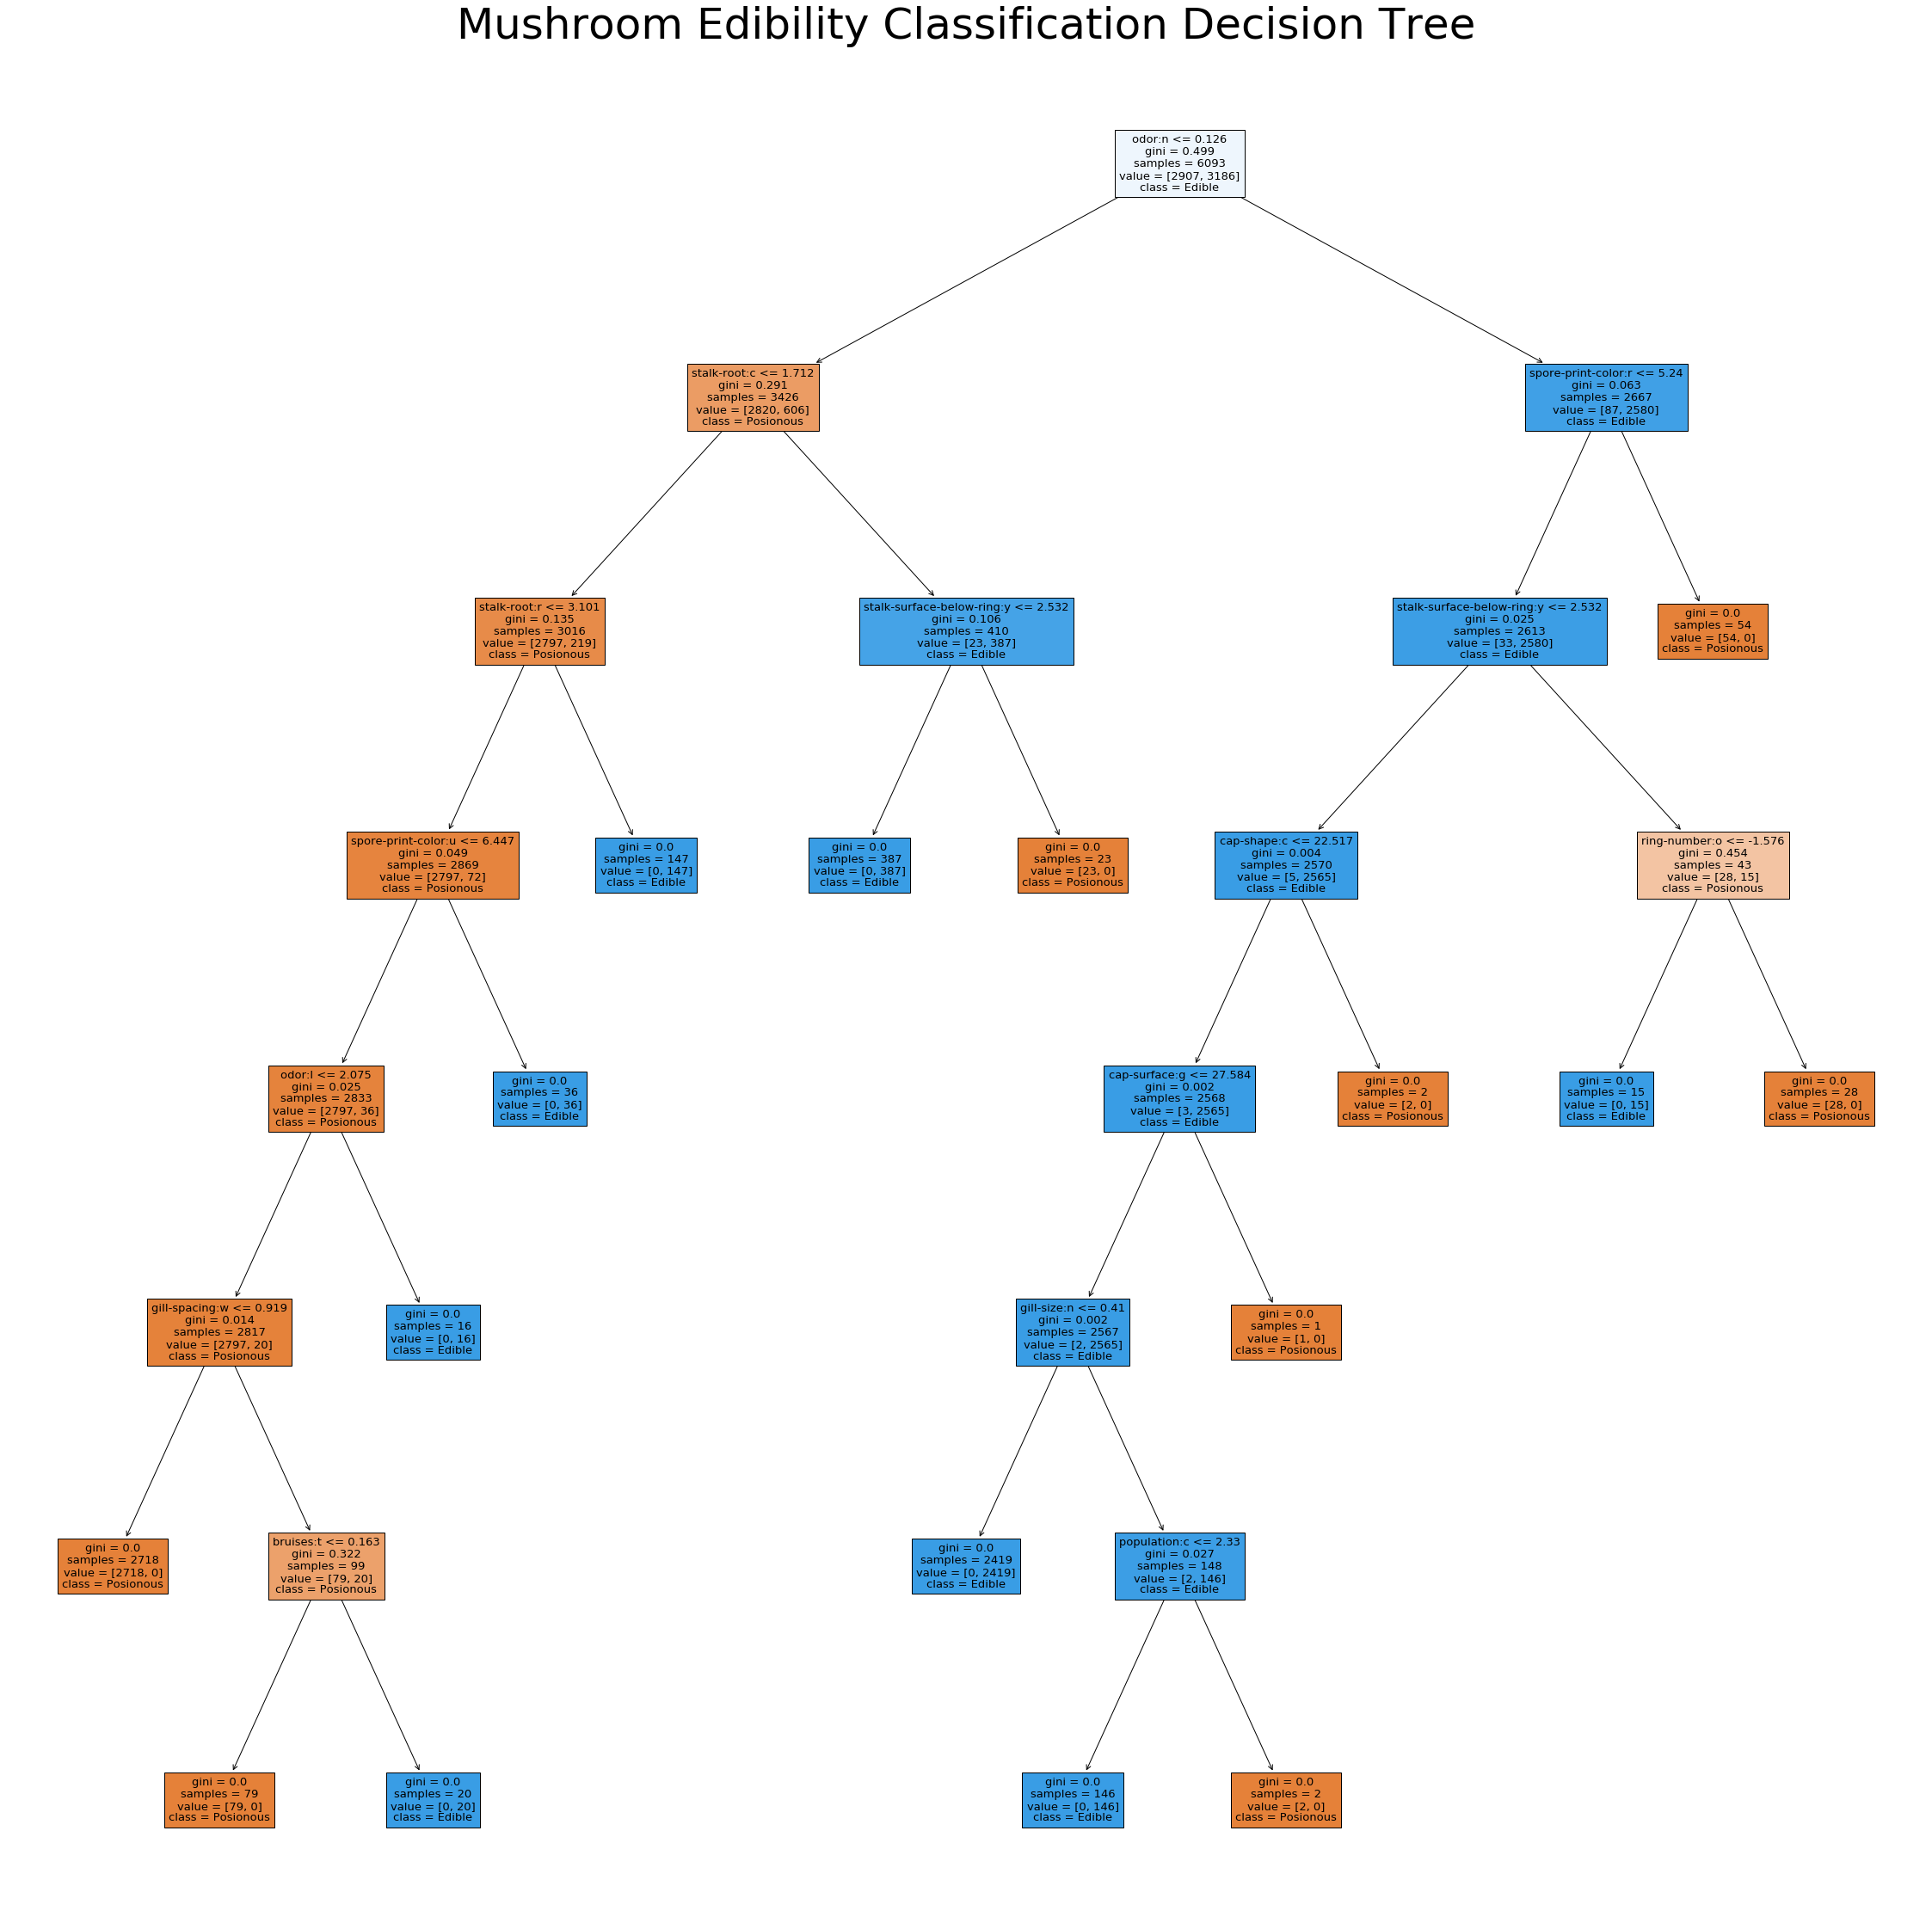

In [25]:
#Plot Decision Tree figure
fig, ax  = plt.subplots(figsize=[40,40])
plot_tree(tree, feature_names=x.columns, class_names =['Posionous','Edible'], filled=True, 
          ax=ax)
ax.set_title('Mushroom Edibility Classification Decision Tree', fontsize=50)

                       Feature  Importance
22                      odor:n    0.616481
42                stalk-root:c    0.180258
44                stalk-root:r    0.087434
80         spore-print-color:r    0.033932
50  stalk-surface-below-ring:y    0.026009
81         spore-print-color:u    0.022796
17                   bruises:t    0.010499
20                      odor:l    0.010318
70               ring-number:o    0.006426
27              gill-spacing:w    0.002565
0                  cap-shape:c    0.001312
84                population:c    0.001298
5                cap-surface:g    0.000657
28                 gill-size:n    0.000017


Text(0.5, 1.0, 'Poisonous Mushroom Classification Feature Importance')

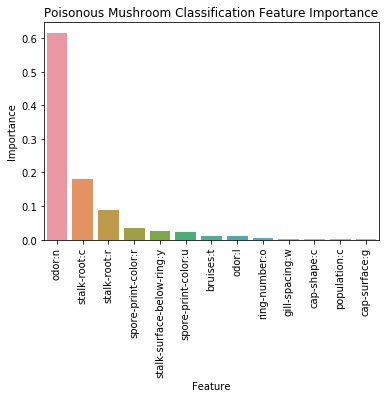

In [22]:
#Create feature importance bar graph for Decision Tree model
feature_importances = pd.concat([pd.DataFrame(x_vars), pd.DataFrame(tree.feature_importances_)], axis=1)
feature_importances.columns = ['Feature', 'Importance']
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importances.head(14))
importance_plot = sns.barplot(x='Feature', y='Importance', data=feature_importances[0:13],)
importance_plot.set_xticklabels(feature_importances['Feature'], rotation=90)
importance_plot.set_title('Poisonous Mushroom Classification Feature Importance')

In [20]:
#Fit t-SNE representation of mushroom dataset
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=2000)
tsne_output = tsne.fit_transform(x)
tsne_df = pd.DataFrame(tsne_output, columns = ['d1', 'd2'])
tsne_df.head()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.169s...
[t-SNE] Computed neighbors for 8124 samples in 8.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.305195
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.375374
[t-SNE] KL divergence after 2000 iterations: 1.464368


,d1,d2
0,74.949631,-124.035820
1,-69.255432,-38.041504
2,-77.135353,-23.777735
3,63.510208,-119.347862
4,-90.570068,95.206512


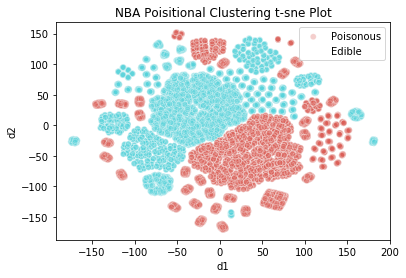

In [21]:
#Plot t-Sne representation of Mushroom dataset
tsne_plot = sns.scatterplot(
    x="d1", y="d2",
    hue=y,
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('NBA Poisitional Clustering t-sne Plot')
tsne_plot.legend(['Poisonous', 'Edible'])